# Parte 3

Aqui foi realizada a modelagem para o Modelo 1, de previsão de longo prazo. O modelo consiste em prever a demanda média, máxima  e mínima em um determinado dia, levando em consideração algumas condições.
Foram testados 3 algoritmos diferentes e realizados alguns testes para encontrar o melhor modelo de cada algoritmo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime
pd.set_option('display.max_columns', 50)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_parquet('DadosFinais/df_final.parquet.gzip', engine='pyarrow')

In [3]:
df.head()

,Data,Demanda_Max,Temperatura_Max,Umidade_Max,IAEBR,Atividade Industrial Sem Ajuste Sazonal,População,Com Feriado,Sábado,Domingo,Dia de Semana,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Março,Maio,Novembro,Outubro,Setembro,Demanda_Min,Temperatura_Min,Umidade_Min,Demanda_Med,Temperatura_Med,Umidade_Med
0,2006-01-01,3302.0,27.300,90.500000,108.55,91.702366,10530809,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1806.0,20.925000,65.75,2277.530556,23.495903,79.253646
1,2006-01-02,3631.0,27.450,87.500000,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2274.0,21.725000,65.00,3045.465278,23.818993,79.031337
2,2006-01-03,3761.0,26.600,82.689583,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2560.0,20.716389,61.00,3213.102778,23.469557,74.780208
3,2006-01-04,3856.0,28.875,82.750000,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2549.0,20.700000,49.75,3256.781944,23.830365,68.286285
4,2006-01-05,3910.0,28.250,73.500000,108.55,91.702366,10530809,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,2649.0,22.166944,54.25,3314.315900,23.972667,67.117089


### Normalização e divisão dos dados

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [5]:
df.columns

Index(['Data', 'Demanda_Max', 'Temperatura_Max', 'Umidade_Max', 'IAEBR',
       'Atividade Industrial Sem Ajuste Sazonal', 'População', 'Com Feriado',
       'Sábado', 'Domingo', 'Dia de Semana', 'Abril', 'Agosto', 'Dezembro',
       'Fevereiro', 'Janeiro', 'Julho', 'Junho', 'Março', 'Maio', 'Novembro',
       'Outubro', 'Setembro', 'Demanda_Min', 'Temperatura_Min', 'Umidade_Min',
       'Demanda_Med', 'Temperatura_Med', 'Umidade_Med'],
      dtype='object')

In [6]:
X = df[['IAEBR', 'Atividade Industrial Sem Ajuste Sazonal', 'População', 'Com Feriado', 'Domingo', 'Sábado',
                 'Dia de Semana', 'Temperatura_Max', 'Umidade_Max', 'Temperatura_Min', 'Umidade_Min', 'Temperatura_Med',
                   'Umidade_Med','Abril', 'Agosto', 'Dezembro',
       'Fevereiro', 'Janeiro', 'Julho', 'Junho', 'Março', 'Maio', 'Novembro',
       'Outubro', 'Setembro']]
Y = df[['Demanda_Max', 'Demanda_Min', 'Demanda_Med']]

In [7]:
scaler = StandardScaler()
X_std = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [8]:
#Dividir entre dataset de treino e teste
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e validação
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e teste dados normalizados
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,Y,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e validação
X_train_std,X_val_std,y_train_std,y_val_std = train_test_split(X_train_std,y_train_std,test_size=0.25,random_state=0)

In [9]:
X_train_std.head()

,IAEBR,Atividade Industrial Sem Ajuste Sazonal,População,Com Feriado,Domingo,Sábado,Dia de Semana,Temperatura_Max,Umidade_Max,Temperatura_Min,Umidade_Min,Temperatura_Med,Umidade_Med,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Março,Maio,Novembro,Outubro,Setembro
2561,0.446584,-0.004444,0.202081,-0.19084,-0.408471,2.450024,-1.580829,0.314059,0.745505,0.893788,0.886674,0.977345,0.144848,-0.303046,-0.305978,-0.297125,-0.293384,3.241200,-0.308528,-0.303046,-0.308528,-0.308528,-0.291878,-0.297125,-0.291878
4531,-0.267940,-1.421138,1.111192,-0.19084,-0.408471,-0.408159,0.632580,0.323066,-1.349620,0.070453,-1.310897,0.162285,-1.220405,-0.303046,-0.305978,-0.297125,-0.293384,-0.308528,-0.308528,-0.303046,-0.308528,3.241200,-0.291878,-0.297125,-0.291878
1923,0.505610,0.637665,-0.154579,-0.19084,-0.408471,-0.408159,0.632580,0.449166,-0.525582,0.118494,-0.727471,0.136544,-0.548160,3.299832,-0.305978,-0.297125,-0.293384,-0.308528,-0.308528,-0.303046,-0.308528,-0.308528,-0.291878,-0.297125,-0.291878
3520,0.635052,-0.424634,0.579613,-0.19084,-0.408471,2.450024,-1.580829,0.075369,0.646199,0.027216,-0.299626,-0.026551,-0.381787,-0.303046,3.268214,-0.297125,-0.293384,-0.308528,-0.308528,-0.303046,-0.308528,-0.308528,-0.291878,-0.297125,-0.291878
280,-1.623465,0.287218,-1.649184,-0.19084,2.448155,-0.408159,-1.580829,-0.338960,-0.176466,-0.318682,-0.571891,-0.440370,-0.467766,-0.303046,-0.305978,-0.297125,-0.293384,-0.308528,-0.308528,-0.303046,-0.308528,-0.308528,-0.291878,3.365589,-0.291878


In [10]:
X_train.head()

,IAEBR,Atividade Industrial Sem Ajuste Sazonal,População,Com Feriado,Domingo,Sábado,Dia de Semana,Temperatura_Max,Umidade_Max,Temperatura_Min,Umidade_Min,Temperatura_Med,Umidade_Med,Abril,Agosto,Dezembro,Fevereiro,Janeiro,Julho,Junho,Março,Maio,Novembro,Outubro,Setembro
2561,139.32,100.156240,11066527,0,0,1,0,25.100,91.215972,21.684514,74.00,24.401137,77.962760,0,0,0,0,1,0,0,0,0,0,0,0
4531,132.42,86.379788,11329605,0,0,0,1,25.150,74.250000,17.400000,45.75,20.216155,65.656684,0,0,0,0,0,0,0,0,1,0,0,0
1923,139.89,106.400341,10963317,0,0,0,1,25.850,80.922917,17.650000,53.25,20.083984,71.716146,1,0,0,0,0,0,0,0,0,0,0,0
3520,141.14,96.070164,11175777,0,0,1,0,23.775,90.411806,17.175000,58.75,19.246563,73.215799,0,1,0,0,0,0,0,0,0,0,0,0
280,119.33,102.992465,10530809,0,1,0,0,21.475,83.750000,15.375000,55.25,17.121780,72.440799,0,0,0,0,0,0,0,0,0,0,1,0


### Random Forest

**Dados não normalizados**

In [11]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [12]:
RF_regressor = RandomForestRegressor(n_estimators=200, oob_score=True)
RF_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [13]:
y_pred = RF_regressor.predict(X_val)
y_pred[:10]

array([[4452.915     , 2505.73      , 3607.18587847],
       [4201.875     , 2215.47      , 3325.93712738],
       [4630.445     , 2627.1       , 3805.30938542],
       [4750.21      , 2991.04      , 3930.47629005],
       [4666.635     , 3142.72      , 3799.91264236],
       [4591.345     , 2533.75      , 3740.44567769],
       [3463.78      , 1948.54      , 2468.27656951],
       [3998.675     , 2276.21      , 3272.29506597],
       [4036.68      , 2341.305     , 3030.52159722],
       [4918.84      , 2756.73      , 3956.63093403]])

#### Avaliação do Modelo

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, explained_variance_score

In [15]:
print('MAE:',mean_absolute_error(y_val, y_pred))
MSE = mean_squared_error(y_val, y_pred)
print('RMSE:', np.sqrt(MSE))
R2 = r2_score(y_val, y_pred)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 136.43401111284976
RMSE: 192.81810065682708
R2 Score: 0.8684653525212805
Adj R2 Score 0.8673629837023171


Text(0.5, 1.0, 'Importância de cada feature')

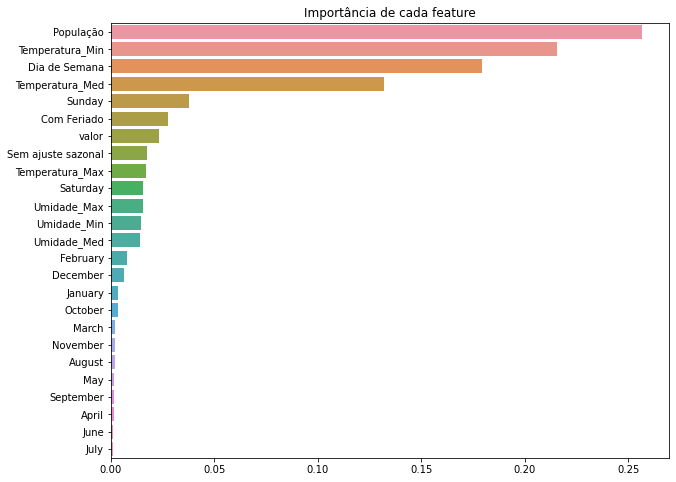

In [16]:
plt.figure(figsize=(10,8 ));
importances = pd.Series(data=RF_regressor.feature_importances_, index=['valor', 'Sem ajuste sazonal',
       'População', 'Com Feriado', 'Sunday', 'Saturday',
       'Dia de Semana','Temperatura_Max',
       'Umidade_Max', 'Temperatura_Min', 'Umidade_Min', 'Temperatura_Med',
       'Umidade_Med', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September' ]).sort_values(ascending=False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada feature')

**Com dados normalizados**

In [17]:
RF_regressor = RandomForestRegressor(n_estimators=200, oob_score=True)
RF_regressor.fit(X_train_std, y_train_std)

RandomForestRegressor(n_estimators=200, oob_score=True)

In [18]:
y_pred = RF_regressor.predict(X_val_std)
y_pred[:10]

array([[4460.585     , 2528.575     , 3624.91144444],
       [4208.06      , 2227.025     , 3330.21814685],
       [4629.63      , 2637.21      , 3814.94003217],
       [4766.175     , 2984.425     , 3931.65087322],
       [4702.9       , 3135.995     , 3807.12299653],
       [4580.85      , 2498.305     , 3720.36314882],
       [3470.31      , 1955.63      , 2464.48965938],
       [3992.025     , 2269.27      , 3271.57045833],
       [4059.195     , 2347.83      , 3041.30938889],
       [4979.83      , 2802.845     , 4003.58107639]])

In [19]:
y_val_std[:10]

,Demanda_Max,Demanda_Min,Demanda_Med
4678,4571.0,2787.0,3782.426389
892,4343.0,2330.0,3401.870833
3215,4523.0,2621.0,3748.583333
1796,4984.0,3048.0,4106.559722
5159,4901.0,3148.0,4048.491667
3189,4614.0,2598.0,3825.556944
91,3470.0,1872.0,2413.688889
1384,3967.0,2276.0,3245.770833
1637,4262.0,2342.0,3064.450000
5020,4836.0,2508.0,3852.847917


**Avaliação do modelo**

In [20]:
print('MAE:',mean_absolute_error(y_val_std, y_pred))
MSE = mean_squared_error(y_val_std, y_pred)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std, y_pred)
print('R2 Score:', R2)
n= len(X_train_std)
p = len(X_train_std.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 136.37485482410054
RMSE: 192.49682411435592
R2 Score: 0.8689970567585332
Adj R2 Score 0.8678991440595601


Percebemos que não tem muita diferença entre os dados normalizados ou não.

Verificando os melhores parâmetros, com o RandomizedSearchCV

In [21]:
from sklearn.model_selection import RandomizedSearchCV
import pprint

In [22]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 500, num = 50)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 20)]
max_depth.append(None)
min_samples_split = [2, 4, 8, 1]
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 15, 20, 25, 31, 36, 41, 46, 52, 57, 62, 67, 73, 78, 83, 88, 94, 99, 104, 110, None], 'min_samples_split': [2, 4, 8, 1], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [23]:
rf = RandomForestRegressor()

In [24]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [25]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 15, 20, 25, 31, 36,
                                                      41, 46, 52, 57, 62, 67,
                                                      73, 78, 83, 88, 94, 99,
                                                      104, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 8, 1],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 110,
                                                         120, 130, 140, 150,
                                                         160, 170, 1

In [26]:
rf_random.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 67,
 'bootstrap': False}

Testando essa configuração:

In [27]:
RF_regressor = RandomForestRegressor(n_estimators=106, min_samples_split=5, min_samples_leaf=1,max_features='sqrt',
                                     max_depth=100, bootstrap=False)
RF_regressor.fit(X_train_std, y_train_std)

RandomForestRegressor(bootstrap=False, max_depth=100, max_features='sqrt',
                      min_samples_split=5, n_estimators=106)

In [28]:
y_pred = RF_regressor.predict(X_val_std)
y_pred[:10]

array([[4439.80503145, 2517.14308176, 3616.99090398],
       [4227.90959119, 2231.78694969, 3339.0532989 ],
       [4592.86320755, 2628.76650943, 3783.11408869],
       [4784.49292453, 2988.08647799, 3943.78445983],
       [4658.77122642, 3093.36871069, 3763.25162801],
       [4581.08176101, 2545.76022013, 3729.45388371],
       [3548.88128931, 2033.01336478, 2571.80098107],
       [3996.44496855, 2301.55896226, 3292.98159043],
       [4062.35377358, 2363.97877358, 3053.73568254],
       [4785.30031447, 2699.7908805 , 3820.25404437]])

In [29]:
y_val_std[:10]

,Demanda_Max,Demanda_Min,Demanda_Med
4678,4571.0,2787.0,3782.426389
892,4343.0,2330.0,3401.870833
3215,4523.0,2621.0,3748.583333
1796,4984.0,3048.0,4106.559722
5159,4901.0,3148.0,4048.491667
3189,4614.0,2598.0,3825.556944
91,3470.0,1872.0,2413.688889
1384,3967.0,2276.0,3245.770833
1637,4262.0,2342.0,3064.450000
5020,4836.0,2508.0,3852.847917


In [30]:
print('MAE:',mean_absolute_error(y_val_std, y_pred))
MSE = mean_squared_error(y_val_std, y_pred)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std, y_pred)
print('R2 Score:', R2)
n= len(X_train_std)
p = len(X_train_std.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 133.41325543966425
RMSE: 187.70427295278853
R2 Score: 0.8759479991931238
Adj R2 Score 0.8749083411240082


In [31]:
RF_regressor = RandomForestRegressor(n_estimators=500, min_samples_split=4, min_samples_leaf=1,max_features='sqrt',
                                     max_depth=67, bootstrap=False)
RF_regressor.fit(X_train_std, y_train_std)

RandomForestRegressor(bootstrap=False, max_depth=67, max_features='sqrt',
                      min_samples_split=4, n_estimators=500)

In [32]:
y_pred = RF_regressor.predict(X_val_std)
y_pred[:10]

array([[4439.973     , 2522.751     , 3617.96850743],
       [4221.41633333, 2227.20533333, 3333.29625849],
       [4600.05466667, 2622.19533333, 3786.85301019],
       [4741.028     , 2980.88866667, 3919.73295415],
       [4607.47833333, 3079.57633333, 3735.26891028],
       [4566.30066667, 2531.79766667, 3717.60726808],
       [3521.915     , 2007.01433333, 2527.66603385],
       [3997.14193939, 2295.3409697 , 3285.79093841],
       [4060.30966667, 2349.925     , 3048.43454625],
       [4820.09533333, 2736.51366667, 3852.73198287]])

In [33]:
y_val_std[:10]

,Demanda_Max,Demanda_Min,Demanda_Med
4678,4571.0,2787.0,3782.426389
892,4343.0,2330.0,3401.870833
3215,4523.0,2621.0,3748.583333
1796,4984.0,3048.0,4106.559722
5159,4901.0,3148.0,4048.491667
3189,4614.0,2598.0,3825.556944
91,3470.0,1872.0,2413.688889
1384,3967.0,2276.0,3245.770833
1637,4262.0,2342.0,3064.450000
5020,4836.0,2508.0,3852.847917


In [34]:
print('MAE:',mean_absolute_error(y_val_std, y_pred))
MSE = mean_squared_error(y_val_std, y_pred)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std, y_pred)
print('R2 Score:', R2)
n= len(X_train_std)
p = len(X_train_std.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 133.73719281190805
RMSE: 187.5481744357431
R2 Score: 0.8760366389114752
Adj R2 Score 0.8749977237162981


Houve uma melhora relativamente pequena. Vamos avaliar separadamente por demanda.

**Avaliação para demanda máxima**

In [35]:
#Demanda Máxima
print('MAE:',mean_absolute_error(y_val_std['Demanda_Max'], y_pred[:,0]))
MSE = mean_squared_error(y_val_std['Demanda_Max'], y_pred[:,0])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std['Demanda_Max'], y_pred[:,0])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std['Demanda_Max'], y_pred[:,0]))

MAE: 133.21540753497078
RMSE: 193.0171769537354
R2 Score: 0.8884260335150341
Adj R2 Score 0.887490951663836
Variance Score: 0.8884320174955922


**Avaliação para demanda média**

In [36]:
#Demanda Média
print('MAE:',mean_absolute_error(y_val_std['Demanda_Med'], y_pred[:,2]))
MSE = mean_squared_error(y_val_std['Demanda_Med'], y_pred[:,2])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std['Demanda_Med'], y_pred[:,2])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std['Demanda_Med'], y_pred[:,2]))

MAE: 120.26350240321531
RMSE: 171.86942196275808
R2 Score: 0.9126433289073524
Adj R2 Score 0.9119112079628952
Variance Score: 0.912651537189316


**Avaliação para demanda mínima**

In [37]:
#Demanda Mínima
print('MAE:',mean_absolute_error(y_val_std['Demanda_Min'], y_pred[:,1]))
MSE = mean_squared_error(y_val_std['Demanda_Min'], y_pred[:,1])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val_std['Demanda_Min'], y_pred[:,1])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_val_std['Demanda_Min'], y_pred[:,1]))

MAE: 147.73266849753773
RMSE: 196.79487899215673
R2 Score: 0.8270405543120388
Adj R2 Score 0.8255910115221632
Variance Score: 0.8270508547560751


In [38]:
importances = pd.Series(data=RF_regressor.feature_importances_, index=['IAEBR', 'Desempenho Industrial',
       'População', 'Com Feriado', 'Domingo', 'Sábado',
       'Dia de Semana','Temperatura_Max',
       'Umidade_Max', 'Temperatura_Min', 'Umidade_Min', 'Temperatura_Med',
       'Umidade_Med', 'Abril', 'Agosto', 'Dezembro', 'Fevereiro',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September' ]).sort_values(ascending=False)

In [39]:
importances[:10]

População                0.173213
Temperatura_Min          0.133279
Temperatura_Med          0.131733
Dia de Semana            0.125609
IAEBR                    0.090134
Domingo                  0.081982
Temperatura_Max          0.067381
Desempenho Industrial    0.037031
Sábado                   0.022070
Com Feriado              0.021985
dtype: float64

<AxesSubplot:>

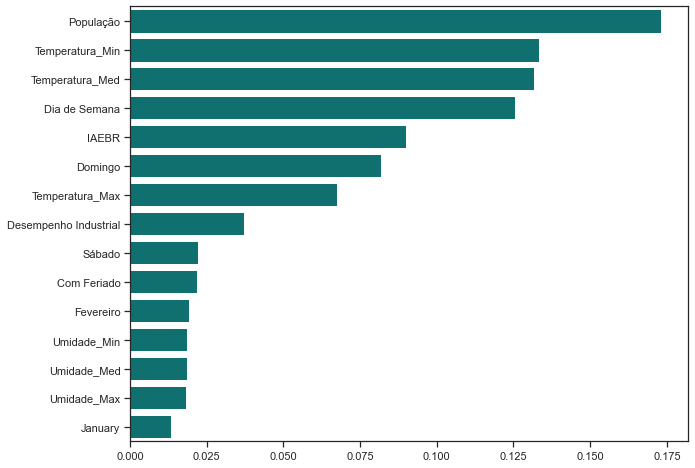

In [40]:
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(10,8 ));
sns.barplot(x=importances[:15], y=importances.index[:15], orient='h', color='teal')

### Treinar o modelo com os dados de validação + treino

In [41]:
#Dividir entre dataset de treino e teste dados normalizados
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,Y,test_size=0.25,random_state=0)

In [42]:
RF_regressor = RandomForestRegressor(n_estimators=500, min_samples_split=4, min_samples_leaf=1,max_features='sqrt',
                                     max_depth=67, bootstrap=False)
RF_regressor.fit(X_train_std, y_train_std)
y_pred = RF_regressor.predict(X_test_std)

**Avaliação para Demanda Máxima**

In [43]:
#Demanda Máxima
print('MAE:',mean_absolute_error(y_test_std['Demanda_Max'], y_pred[:,0]))
MSE = mean_squared_error(y_test_std['Demanda_Max'], y_pred[:,0])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test_std['Demanda_Max'], y_pred[:,0])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 136.02733996219993
RMSE: 200.95487309033524
R2 Score: 0.8879767993342329
Adj R2 Score 0.8870379525301283


**Avaliação para Demanda Média**

In [44]:
#Demanda Média
print('MAE:',mean_absolute_error(y_test_std['Demanda_Med'], y_pred[:,2]))
MSE = mean_squared_error(y_test_std['Demanda_Med'], y_pred[:,2])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test_std['Demanda_Med'], y_pred[:,2])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 122.82977789347228
RMSE: 182.469775262558
R2 Score: 0.9084933547622698
Adj R2 Score 0.9077264536121045


**Avaliação para Demanda Mínima**

In [45]:
#Demanda Mínima
print('MAE:',mean_absolute_error(y_test_std['Demanda_Min'], y_pred[:,1]))
MSE = mean_squared_error(y_test_std['Demanda_Min'], y_pred[:,1])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test_std['Demanda_Min'], y_pred[:,1])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 147.81126741835902
RMSE: 204.7976434141169
R2 Score: 0.8283027621590114
Adj R2 Score 0.8268637977118023


### SVR

Com o SVR não é possível prever as 3 demandas de apenas uma vez. Para esse algoritmo será utilizado apenas os dados normalizados, pela maneira como ele funciona.

In [46]:
from sklearn.svm import SVR

In [47]:
#Dividir entre dataset de treino e teste dados normalizados
X_train_std,X_test_std,y_train_std,y_test_std = train_test_split(X_std,Y,test_size=0.25,random_state=0)

#Dividir entre dataset de treino e validação
X_train_std,X_val_std,y_train_std,y_val_std = train_test_split(X_train_std,y_train_std,test_size=0.25,random_state=0)

**Previsão da demanda máxima**

In [48]:
svr_max = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.5,
               coef0=1)
svr_max.fit(X_train_std,y_train_std['Demanda_Max'])
y_pred_max = svr_max.predict(X_val_std)

**Avaliação do modelo**

In [49]:
print('Predição Demanda Máxima')
print('MAE:',mean_absolute_error(y_val['Demanda_Max'], y_pred_max))
MSE = mean_squared_error(y_val['Demanda_Max'], y_pred_max)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val['Demanda_Max'], y_pred_max)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Máxima
MAE: 129.7216006461115
RMSE: 192.55918964853836
R2 Score: 0.888954886305821
Adj R2 Score 0.8880242366771403


**Previsão da demanda média**

In [50]:
svr_med= SVR(kernel='poly', C=140, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_med.fit(X_train_std,y_train_std['Demanda_Med'])
y_pred_med = svr_med.predict(X_val_std)

**Avaliação do modelo**

In [51]:
print('Predição Demanda Média')
print('MAE:',mean_absolute_error(y_val['Demanda_Med'], y_pred_med))
MSE = mean_squared_error(y_val['Demanda_Med'], y_pred_med)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val['Demanda_Med'], y_pred_med)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Média
MAE: 106.79272547630904
RMSE: 159.50323268170987
R2 Score: 0.9247618995808036
Adj R2 Score 0.9241313422524495


**Previsão da demanda mínima**

In [52]:
svr_min = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_min.fit(X_train_std,y_train_std['Demanda_Min'])
y_pred_min = svr_min.predict(X_val_std)

**Avaliação do modelo**

In [53]:
print('Predição Demanda Mínima')
print('MAE:',mean_absolute_error(y_val['Demanda_Min'], y_pred_min))
MSE = mean_squared_error(y_val['Demanda_Min'], y_pred_min)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_val['Demanda_Min'], y_pred_min)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Mínima
MAE: 130.32110526169168
RMSE: 179.33207137382763
R2 Score: 0.8563741445520938
Adj R2 Score 0.8551704414390541


### Treinamento do modelo com dados de treino + validação

In [54]:
#Dividir entre dataset de treino e teste dados normalizados
X_train,X_test, y_train, y_test = train_test_split(X_std,Y,test_size=0.25,random_state=0)

In [55]:
svr_max = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.5,
               coef0=1)
svr_max.fit(X_train,y_train['Demanda_Max'])
y_pred_max = svr_max.predict(X_test)

In [56]:
svr_med= SVR(kernel='poly', C=140, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_med.fit(X_train,y_train['Demanda_Med'])
y_pred_med = svr_med.predict(X_test)

In [57]:
svr_min = SVR(kernel='poly', C=190, gamma='auto', degree=3, epsilon=.1,
               coef0=1)
svr_min.fit(X_train,y_train['Demanda_Min'])
y_pred_min = svr_min.predict(X_test)

**Avaliação com o dataset de teste**

In [58]:
print('Predição Demanda Máxima')
print('MAE:',mean_absolute_error(y_test['Demanda_Max'], y_pred_max))
MSE = mean_squared_error(y_test['Demanda_Max'], y_pred_max)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Max'], y_pred_max)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Máxima
MAE: 129.75724629788772
RMSE: 184.52633953514535
R2 Score: 0.9055444185043627
Adj R2 Score 0.9049519976470143


In [59]:
print('Predição Demanda Média')
print('MAE:',mean_absolute_error(y_test['Demanda_Med'], y_pred_med))
MSE = mean_squared_error(y_test['Demanda_Med'], y_pred_med)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Med'], y_pred_med)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Média
MAE: 113.08148081770504
RMSE: 163.7525709923894
R2 Score: 0.9263034743128643
Adj R2 Score 0.9258412532536123


In [60]:
print('Predição Demanda Máxima')
print('MAE:',mean_absolute_error(y_test['Demanda_Min'], y_pred_min))
MSE = mean_squared_error(y_test['Demanda_Min'], y_pred_min)
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Min'], y_pred_min)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

Predição Demanda Máxima
MAE: 136.05926945081785
RMSE: 190.15764421820884
R2 Score: 0.8519729870415589
Adj R2 Score 0.851044568746536


### Rede Neural

In [61]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense

In [62]:
from keras.regularizers import l1
from keras.regularizers import l2
from keras.regularizers import l1_l2

Using TensorFlow backend.


**Divisão dos dados**

In [63]:
X_train,X_test,y_train,y_test = train_test_split(X_std,Y,test_size=0.25,random_state=0)

**Previsão de todas as demandas juntas**

In [64]:
model = Sequential()
model.add(Dense(128, input_dim=25, kernel_initializer='normal', activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu')) ##Estava 32 e troquei para 16
model.add(Dense(16, activation='linear'))
model.add(Dense(3, activation='linear'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               3328      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 9,09

In [65]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model.fit(X_train, y_train, epochs=100, batch_size=16,  verbose=0, validation_split=0.2)

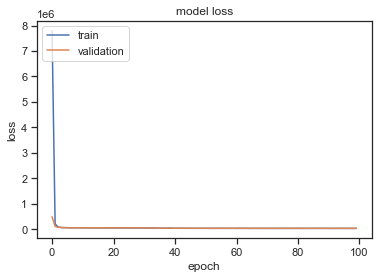

In [66]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim((15000,50000))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

***Diminuindo uma camada:***

In [67]:
model_2 = Sequential()
model_2.add(Dense(128, input_dim=25, kernel_initializer='normal', activation='relu'))
model_2.add(Dense(32, activation='relu'))
model_2.add(Dense(16, activation='linear'))
model_2.add(Dense(3, activation='linear'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 128)               3328      
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 51        
Total params: 8,035
Trainable params: 8,035
Non-trainable params: 0
_________________________________________________________________


In [68]:
model_2.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model_2.fit(X_train, y_train, epochs=100, batch_size=16,  verbose=0, validation_split=0.2)

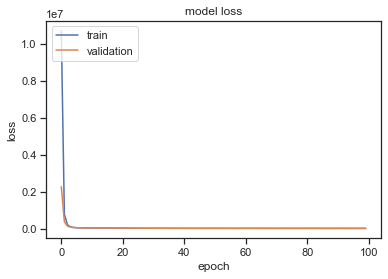

In [69]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.ylim((15000,50000))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [70]:
model_3 = Sequential()
model_3.add(Dense(128, input_dim=25, kernel_initializer='orthogonal', activation='relu'))
model_3.add(Dense(32, activation='relu')) ##Melhorou um pouco com a regularização
model_3.add(Dense(3, activation='linear'))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               3328      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 99        
Total params: 7,555
Trainable params: 7,555
Non-trainable params: 0
_________________________________________________________________


In [71]:
model_3.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model_3.fit(X_train, y_train, epochs=200, batch_size=16,  verbose=0, validation_split=0.2)

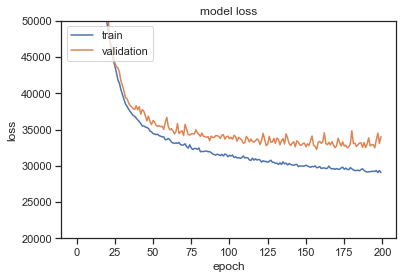

In [72]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((20000,50000))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Incluindo regularização

In [73]:
model_4 = Sequential()
model_4.add(Dense(128, input_dim=25, kernel_initializer='orthogonal', activation='relu'))
model_4.add(Dense(32, activation='relu', activity_regularizer =l1(0.001))) ##Melhorou um pouco com a regularização
model_4.add(Dense(3, activation='linear'))
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               3328      
_________________________________________________________________
dense_13 (Dense)             (None, 32)                4128      
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
Total params: 7,555
Trainable params: 7,555
Non-trainable params: 0
_________________________________________________________________


In [74]:
model_4.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])
history = model_4.fit(X_train, y_train, epochs=200, batch_size=16,  verbose=0, validation_split=0.2)
#,  callbacks=[callback])

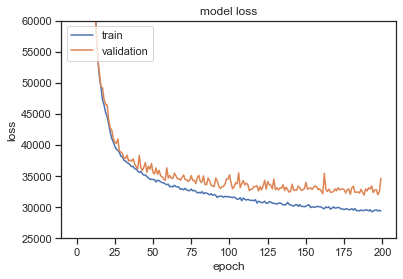

In [75]:
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.ylim((25000,60000))
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [76]:
model_4.evaluate(X_test, y_test, batch_size=16)

1338/1338 [==============================] - 0s 32us/sample - loss: 35119.9954 - mean_squared_error: 35115.8281 - mean_absolute_error: 138.4483


[35119.99542373178, 35115.83, 138.44833]

In [77]:
y_pred = model_4.predict(X_test_std)
y_pred[10:20]

array([[5045.5894, 3115.491 , 4154.9956],
       [4201.7427, 2459.0508, 3507.7844],
       [4586.9556, 2920.9429, 3789.3848],
       [4459.477 , 2525.6558, 3544.1477],
       [5325.3057, 3092.1167, 4332.121 ],
       [5359.4263, 3480.7644, 4433.2017],
       [3660.8413, 1983.8883, 2626.8003],
       [6449.7725, 4030.3098, 5266.25  ],
       [4673.031 , 2998.5408, 3866.0435],
       [4075.0938, 2441.0212, 3114.7732]], dtype=float32)

In [78]:
y_test_std[10:20]

,Demanda_Max,Demanda_Min,Demanda_Med
3260,5296.0,3211.0,4334.384028
3595,4371.0,2467.0,3544.848611
2217,4957.0,3301.0,4173.518750
5225,4698.0,2568.0,3581.936111
3244,5563.0,3306.0,4522.844444
3302,5647.0,3471.0,4628.973611
3584,3377.0,1782.0,2431.307639
2955,6476.0,3949.0,5214.668056
731,4248.0,2542.0,3480.706944
4626,4170.0,2472.0,3241.348611


**Avaliação do modelo 3 demandas juntas**

In [79]:
print('MAE:',mean_absolute_error(y_test, y_pred))
MSE = mean_squared_error(y_test, y_pred)
print('RMSE:',np.sqrt(MSE))
print('MSE log error:', mean_squared_log_error(y_test, y_pred))
R2 = r2_score(y_test, y_pred)
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))

MAE: 138.4483606723663
RMSE: 187.39216528333162
MSE log error: 0.0031321669372165874
R2 Score: 0.8864819104308229
Adj R2 Score 0.8857699304410513


**Avaliação do modelo demanda máxima**

In [80]:
#Demanda Máxima
print('MAE:',mean_absolute_error(y_test['Demanda_Max'], y_pred[:,0]))
MSE = mean_squared_error(y_test['Demanda_Max'], y_pred[:,0])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Max'], y_pred[:,0])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Max'], y_pred[:,0]))

MAE: 146.00614858493321
RMSE: 197.31927932191152
R2 Score: 0.8919934897964051
Adj R2 Score 0.8913160781669295
Variance Score: 0.897789310023715


**Avaliação do modelo demanda média**

In [81]:
#Demanda Média
print('MAE:',mean_absolute_error(y_test['Demanda_Med'], y_pred[:,2]))
MSE = mean_squared_error(y_test['Demanda_Med'], y_pred[:,2])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Med'], y_pred[:,2])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Med'], y_pred[:,2]))

MAE: 125.05186155410026
RMSE: 170.96708865016973
R2 Score: 0.9196666658917403
Adj R2 Score 0.9191628190897567
Variance Score: 0.9229993466585356


**Avaliação do modelo demanda mínima**

In [82]:
#Demanda Mínima
print('MAE:',mean_absolute_error(y_test['Demanda_Min'], y_pred[:,1]))
MSE = mean_squared_error(y_test['Demanda_Min'], y_pred[:,1])
print('RMSE:',np.sqrt(MSE))
R2 = r2_score(y_test['Demanda_Min'], y_pred[:,1])
print('R2 Score:', R2)
n= len(X_train)
p = len(X_train.columns)
print('Adj R2 Score', 1-(1-R2)*(n-1)/(n-p-1))
print('Variance Score:', explained_variance_score(y_test['Demanda_Min'], y_pred[:,1]))

MAE: 144.28707187806543
RMSE: 192.82849228029784
R2 Score: 0.8477855756043233
Adj R2 Score 0.8468308940664678
Variance Score: 0.8529436295593079
